<a href="https://colab.research.google.com/github/hilaltekgz/Yaz-muh-guncel-konular-proje/blob/master/gunluk_PM10_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels as sm


plt.style.use('seaborn')


plt.rcParams['figure.figsize'] = [8,6]


veri = pd.read_csv("/content/drive/My Drive/guncel/Kocaeli_Orj.csv")
veri.head()

,Unnamed: 0,id,Tarih,Kocaeli-PM10,Kocaeli-PM10Debi,Kocaeli-SO2,Kocaeli-NO2,Kocaeli-NOX,Kocaeli-NO,Kocaeli-O3,Kocaeli-HavaSicakligi,Kocaeli-RuzgarHizi,Kocaeli-BagilNem,Kocaeli-KabinSicakligi,Kocaeli-KabinNem,Kocaeli-PM25,Kocaeli-PM25Debi,Gebze-SO2,Gebze-M10,Gebze-PM10Debi,Gebze-NO2,Gebze-NOX,Gebze-NO,Gebze-O3,Gebze-HavaSicakligi,Gebze-RuzgarHizi,Gebze-BagilNem,Yenikoy-SO2,Yenikoy-M10,Yenikoy-PM10Debi,Yenikoy-NO2,Yenikoy-NOX,Yenikoy-NO,Yenikoy-O3,Yenikoy-HavaSicakligi,Yenikoy-RuzgarHizi,Yenikoy-BagilNem,Yenikoy-PM25Debi,Yenikoy-PM25,Alikahya-SO2,Alikahya-M10,Alikahya-PM10Debi,Alikahya-NO2,Alikahya-NOX,Alikahya-NO,Alikahya-O3,Alikahya-HavaSicakligi,Alikahya-RuzgarHizi,Alikahya-BagilNem,Alikahya-PM25Debi,Alikahya-PM25,Golcuk-SO2,Golcuk-M10,Golcuk-PM10Debi,Golcuk-NO2,Golcuk-NOX,Golcuk-NO,Golcuk-O3,Golcuk-HavaSicakligi,Golcuk-RuzgarHizi,Golcuk-BagilNem,Golcuk-PM25Debi,Golcuk-PM25,Year,Month,Day
0,0,0,2010-01-01,7.93,36.45,0.85,58.05,174.11,75.850,9.820,8.12,2.15,72090.66,34.36,25.67,NaN,NaN,7.13,24.23,16.66,56.58,197.740,42.76,9.750000,4.580000,0.620,82.640000,3.14,35.80,16.61,34.85,73.83,25.42,15.47,3.670,1.01,92.01,NaN,NaN,3.85,47.88,16.37,31.22,104.11,50.12,NaN,5.000,0.64,86.79,NaN,NaN,6.38,36.64,16.70,35.76,65.11,19.13,15.79,4.94,1.59,85.61,16.68,30.79,2010,1,1
1,1,1,2010-01-02,8.99,51.78,0.85,60.42,145.27,55.460,11.610,11.50,1.80,68290.70,12.53,25.67,NaN,NaN,3.21,13.49,16.67,49.72,117.220,18.87,11.730000,4.400000,0.660,91.330000,3.69,12.68,16.64,24.63,39.79,9.89,28.34,4.980,1.45,98.27,NaN,NaN,4.33,23.22,16.39,40.87,87.46,30.69,NaN,5.390,1.18,95.02,NaN,NaN,3.03,15.43,16.71,23.68,35.17,7.51,28.58,5.74,1.74,91.00,16.68,12.82,2010,1,2
2,2,2,2010-01-03,21.38,82.92,0.85,66.89,213.09,95.555,10.705,15.44,1.76,46.73,0.70,41.03,NaN,NaN,8.76,23.50,16.66,47.62,94.170,14.08,16.480000,5.070000,1.120,72.140000,8.94,36.16,16.57,41.33,85.16,28.60,17.23,3.840,1.08,90.38,NaN,NaN,7.73,57.16,16.40,46.39,172.20,82.17,NaN,3.460,0.95,90.56,NaN,NaN,17.19,41.45,16.71,35.08,88.93,35.10,21.70,5.15,2.77,82.00,16.68,29.08,2010,1,3
3,3,3,2010-01-04,15.61,85.15,0.85,73.37,280.92,135.650,9.800,12.45,1.52,45.11,0.70,38.60,NaN,NaN,7.58,39.02,16.66,71.41,200.705,74.72,10.125245,4.136667,0.745,76.345677,7.62,46.98,16.54,45.29,109.86,42.08,13.63,4.860,0.96,90.08,NaN,NaN,6.09,55.70,16.53,46.83,165.58,77.30,NaN,4.850,0.69,86.98,NaN,NaN,15.67,49.40,16.70,46.69,132.45,55.96,11.07,5.42,1.39,86.47,16.68,38.86,2010,1,4
4,4,4,2010-01-05,17.14,99.72,0.85,83.85,365.30,183.950,3.750,10.62,1.25,52.20,0.70,54.79,NaN,NaN,8.58,47.72,16.66,90.69,307.240,135.36,5.450000,3.203333,0.370,86.780000,2.06,25.24,16.57,41.31,91.55,33.09,12.23,3.495,1.06,97.41,NaN,NaN,2.36,50.60,16.63,48.34,177.02,84.32,NaN,3.565,0.65,96.94,NaN,NaN,7.88,30.60,16.70,38.92,70.38,20.55,12.90,2.98,2.08,87.39,16.68,23.40,2010,1,5


In [0]:
veri.describe().T
hki=""

In [0]:
def Hesapla_SO2(so2):
    if (so2<=50):
     hki= 'İyi'
    if (so2>50 and so2<=100):
     hki= 'Orta'
    if (so2>100 and so2<=150):
     hki= 'Hassas'
    if (so2>380 and so2<=800):
     hki= 'Sağlıksız'
    if (so2>800 and so2<=1600):
     hki= 'Kötü'
    if (so2>1600):
     hki= 'Tehlikeli'
    return hki
veri['Hava_Kalite_İndeksi']=veri['Kocaeli-SO2'].apply(Hesapla_SO2)
df= veri[['Kocaeli-SO2','Hava_Kalite_İndeksi']]
df.head()

,Kocaeli-SO2,Hava_Kalite_İndeksi
0,0.85,İyi
1,0.85,İyi
2,0.85,İyi
3,0.85,İyi
4,0.85,İyi


In [0]:
def Hesapla_PM10(Pm10):
    hki = ""
    if (Pm10>=0 and Pm10<=50):
     hki= 'İyi'
    if (Pm10>=51 and Pm10<=100):
     hki= 'Orta'
    if (Pm10>=101 and Pm10<=260):
     hki= 'Hassas'
    if (Pm10>=261 and Pm10<=400):
     hki= 'Sağlıksız'
    if (Pm10>=401 and Pm10<=520):
     hki= 'Kötü'
    if (Pm10>521):
     hki= 'Tehlikeli'
    return hki
veri['HKİ']=veri['Kocaeli-PM10'].apply(Hesapla_PM10)
df= veri[['Kocaeli-PM10','HKİ']]


In [0]:
def Hesapla_N02(N02):
    hki = ""
    if (N02>=0 and N02<=100):
     hki= 'İyi'
    if (N02>=101 and N02<=200):
     hki= 'Orta'
    if (N02>=201 and N02<=500):
     hki= 'Hassas'
    if (N02>=501 and N02<=1000):
     hki= 'Sağlıksız'
    if (N02>=1001 and N02<=2000):
     hki= 'Kötü'
    if (N02>2001):
     hki= 'Tehlikeli'
    return hki
veri['HKİ']=veri['Kocaeli-NO2'].apply(Hesapla_N02)
df= veri[['Kocaeli-NO2','HKİ']]
df

,Kocaeli-NO2,HKİ
0,58.05,İyi
1,60.42,İyi
2,66.89,İyi
3,73.37,İyi
4,83.85,İyi
...,...,...
3282,9.42,İyi
3283,9.42,İyi
3284,9.42,İyi
3285,9.42,İyi


In [0]:
def Hesapla_O3(O3):
    if (O3>=0 and O3<=120):
     hki= 'İyi'
    if (O3>=121 and O3<=160):
     hki= 'Orta'
    if (O3>=161 and O3<=180):
     hki= 'Hassas'
    if (O3>=181 and O3<=240):
     hki= 'Sağlıksız'
    if (O3>=241 and O3<=700):
     hki= 'Kötü'
    if (O3>701):
     hki= 'Tehlikeli'
    return hki
veri['HKİ']=veri['Kocaeli-O3'].apply(Hesapla_O3)
df= veri[['Kocaeli-O3','HKİ']]

In [0]:
PM10 = veri['Kocaeli-PM10']
Tarih = veri['Tarih']
PM10 = pd.DataFrame(PM10)

veri_PM10 = PM10.join(veri['Tarih'],how='inner')
veri_PM10
veri_PM10["Tarih"] = pd.to_datetime(veri_PM10["Tarih"])

veri_PM10.set_index("Tarih", inplace = True)

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                       Kocaeli-PM10   No. Observations:                 3287
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -9982.348
Date:                            Sat, 13 Jun 2020   AIC                          19974.697
Time:                                    15:30:40   BIC                          20005.144
Sample:                                01-01-2010   HQIC                         19985.602
                                     - 12-31-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3123      0.024     13.133      0.000       0.266       0.359
ma.L1         -0.5573      0.022   

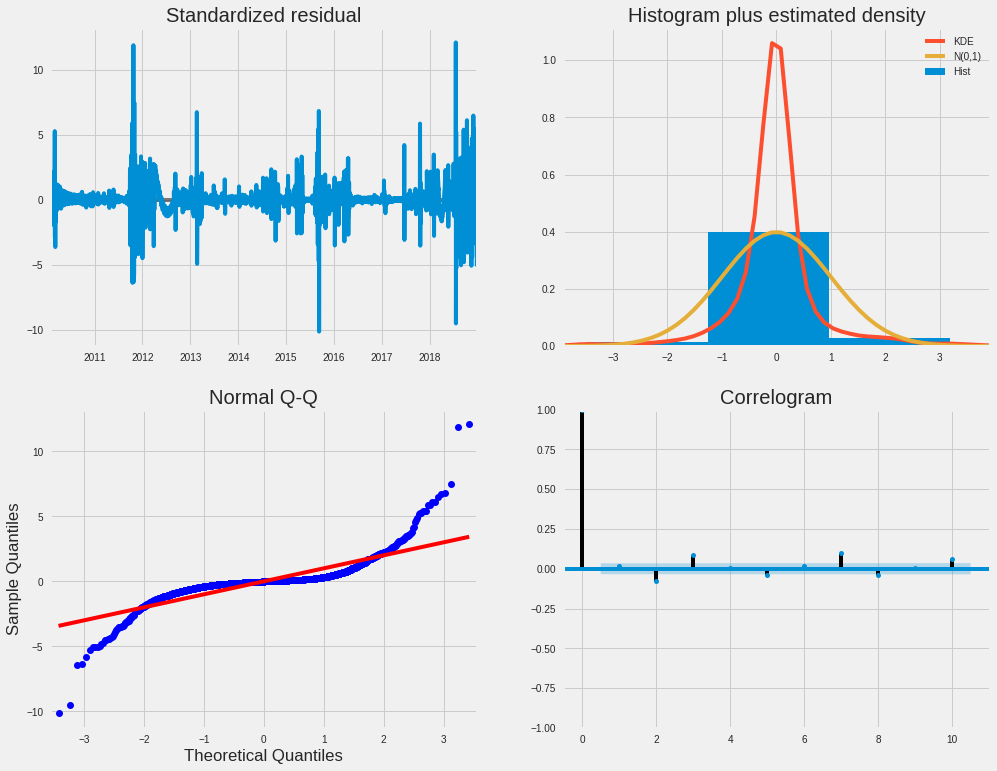

In [68]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
# 0 ile 2 arasında herhangi bir değer almak için p, d ve q parametrelerini tanımlayın
p = d = q = range(0, 2)

# Tüm farklı p, q ve q üçlülerini oluşturun
pdq = list(itertools.product(p, d, q))

# Mevsimsel p, q ve q üçüzlerinin tüm farklı kombinasyonlarını oluşturun
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

from statsmodels.tsa.arima_model import ARMA
mod = sm.tsa.statespace.SARIMAX(veri_PM10,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()
results.save('model.pkl')

print(results.summary())
results.plot_diagnostics(figsize=(15, 12))
plt.show()






In [106]:
import datetime
from statsmodels.tsa.arima_model import ARIMAResults

loaded = ARIMAResults.load('/content/model.pkl')
print(loaded.params)

predictions = loaded.predict(start='2018-01-01', end='2021-01-01')
print(predictions['2020-06-12'])
now_pred = predictions[pd.datetime.now (). strftime ("%Y-%m-%d")]
Hesapla_PM10(now_pred)

ar.L1        0.312255
ma.L1       -0.557254
ar.S.L12     0.005099
ma.S.L12    -0.976663
sigma2      26.495451
dtype: float64
57.25228957473878


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  if __name__ == '__main__':


'Orta'